<a href="https://colab.research.google.com/github/Ramtez7/EDA-Analysis-Based-on-the-data-of-Airbnb-Bookings-/blob/main/EDA_Analysis_of_Airbnb_Bookings_By_RamTeja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name:** Exploratory Data Analysis of Airbnb Bookings

EDA Analysis Based on the data of **Airbnb Bookings** using the Python libraries **Matplolib** And **Seaborn** And **folium**

# **Project Summary-**
Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

## **First import the modules And Csv file!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from google.colab import drive
drive.mount("/content/drive")

path="/content/drive/MyDrive/Datasets/Airbnb NYC 2019.csv"

Mounted at /content/drive


In [ ]:
df=pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


#To check the imformation of the data set-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

To check the null values in each column and how many they are!

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## **To check the Null values in the data frame using Heat-Map**

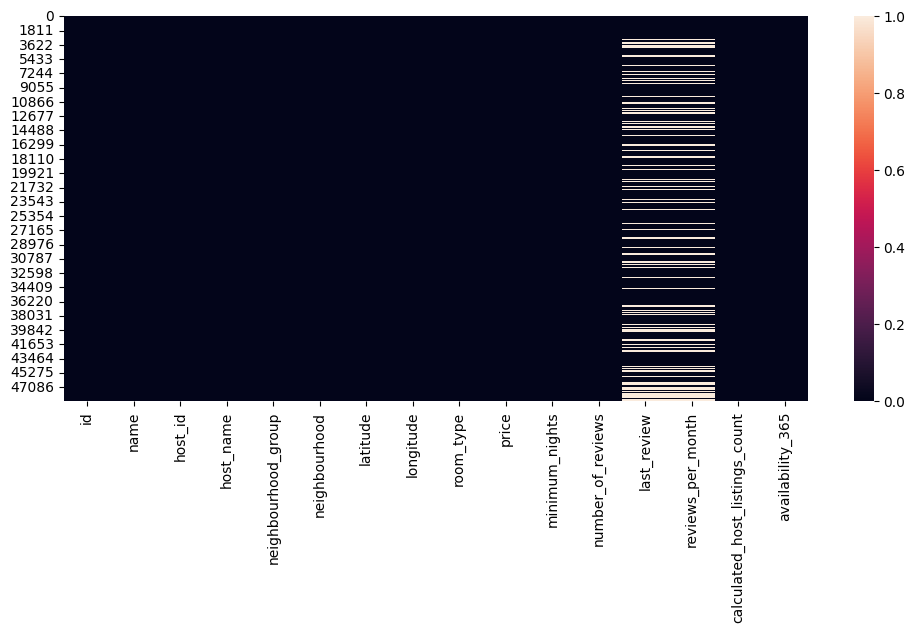

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isna())
plt.show()

 **As we can see that in the heatmap the null values in the columns of last_review and reviews_per_month**

In [ ]:
df.fillna({"reviews_per_month":0,"last_review":0},inplace=True)

# **Get Correlation between different variables**


<ipython-input-16-37977f266cf2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr(method="kendall")


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.420839,0.003315,0.048173,-0.015154,-0.041880,-0.219792,0.243300,0.103732,0.119636
host_id,0.420839,1.000000,0.033103,0.074113,-0.049696,-0.093476,-0.088893,0.177456,0.112193,0.120790
latitude,0.003315,0.033103,1.000000,0.036699,0.090532,0.016805,-0.030714,-0.015486,0.001361,-0.005180
longitude,0.048173,0.074113,0.036699,1.000000,-0.302361,-0.086497,0.055079,0.079830,0.050607,0.048909
price,-0.015154,-0.049696,0.090532,-0.302361,1.000000,0.074233,-0.037926,-0.012414,-0.085327,0.061053
minimum_nights,-0.041880,-0.093476,0.016805,-0.086497,0.074233,1.000000,-0.132916,-0.216179,0.047818,0.056693
number_of_reviews,-0.219792,-0.088893,-0.030714,0.055079,-0.037926,-0.132916,1.000000,0.533753,0.044516,0.174963
reviews_per_month,0.243300,0.177456,-0.015486,0.079830,-0.012414,-0.216179,0.533753,1.000000,0.111728,0.272799
calculated_host_listings_count,0.103732,0.112193,0.001361,0.050607,-0.085327,0.047818,0.044516,0.111728,1.000000,0.330602
availability_365,0.119636,0.120790,-0.005180,0.048909,0.061053,0.056693,0.174963,0.272799,0.330602,1.000000


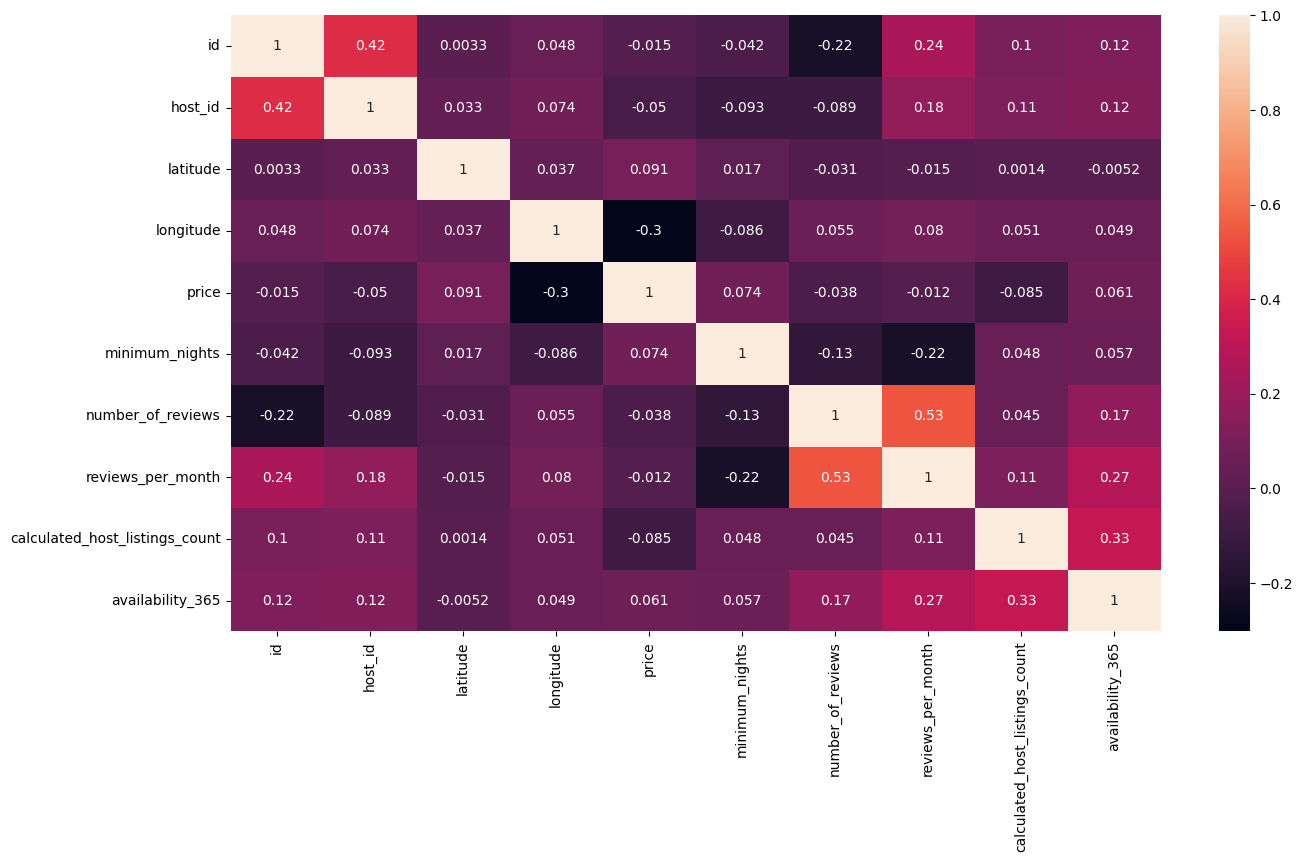

In [ ]:
corr_df=df.corr(method="kendall")

plt.figure(figsize=(15,8))
sns.heatmap(corr_df,annot=True)
corr_df

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# ***To show the 'latitude','longitude' of columns data in a map using folium library ***

In [ ]:
locations=list(zip(df.latitude,df.longitude))
map1 = folium.Map(location=[40.60,-73.80],zoom_start=10.5,width=1200, height=600)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Scatter plot of "neighbourhood_group" location based on the "latitude" And "longitude"**


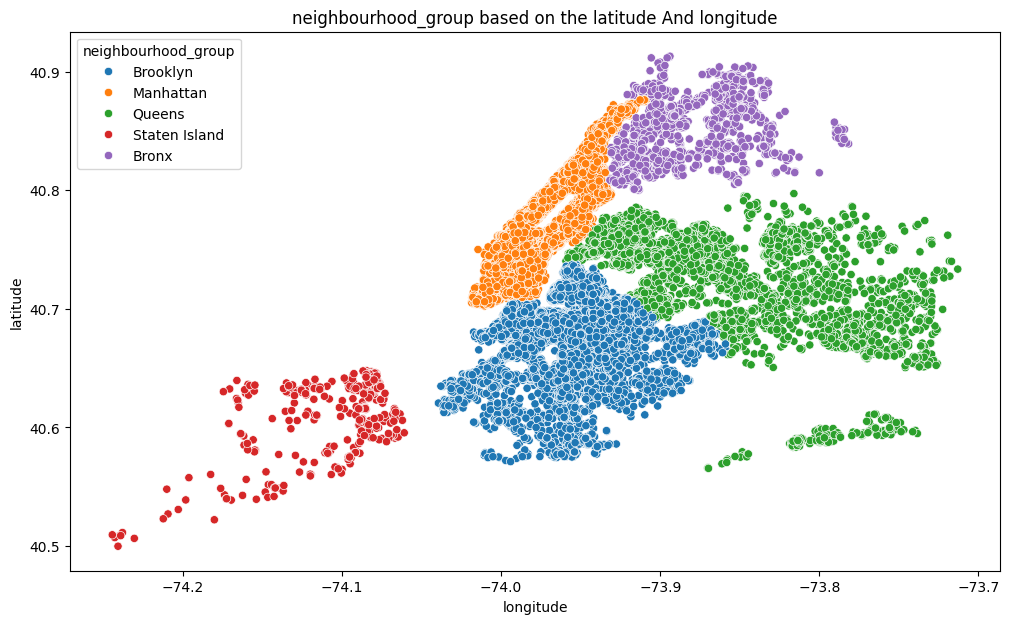

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="longitude",y="latitude",hue="neighbourhood_group")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("neighbourhood_group based on the latitude And longitude")
plt.show()

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# **TO COMPARE THE (ROOM_TYPE) BY GROUPING THE DATA**

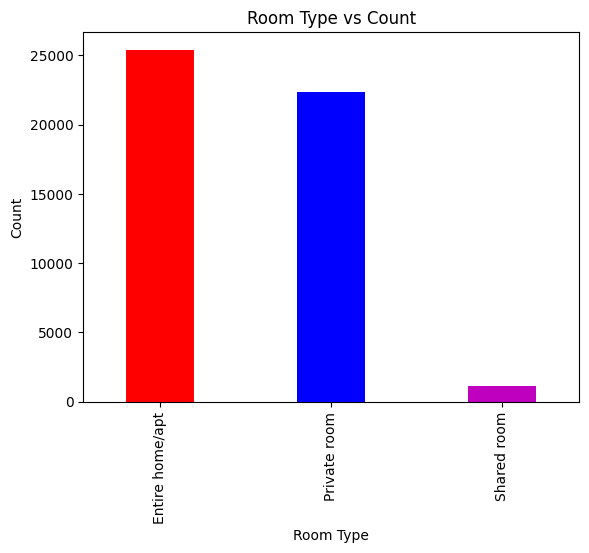

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [ ]:
df["room_type"].value_counts().plot(kind="bar",color=["red","blue","m"],width=0.4)
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Room Type vs Count")
plt.show()
print(df["room_type"].value_counts())

**as we can see that in above bar plot Entire home/apt and Private room have more rooms than Shared room**

# **Now we can check Home/apt rooms,locations and how many are there!:**

**1. first we check the how many of the (home/aprt) And in  which location ?**

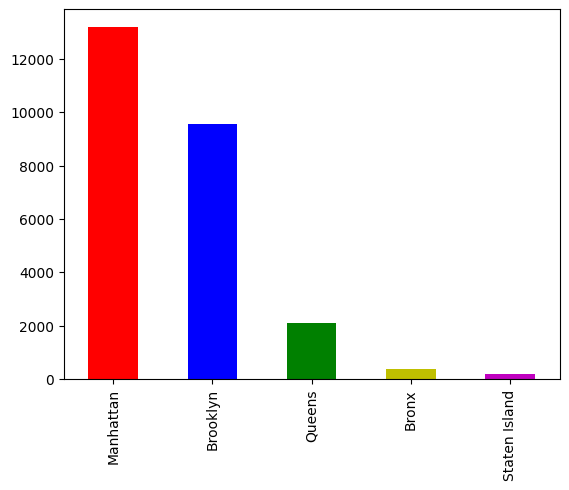

Manhattan        13199
Brooklyn          9559
Queens            2096
Bronx              379
Staten Island      176
Name: neighbourhood_group, dtype: int64


In [ ]:
apt=df[df['room_type']=="Entire home/apt"]

apt["neighbourhood_group"].value_counts().plot(kind="bar",color=["r","b","g","y","m"])
plt.show()

print(apt["neighbourhood_group"].value_counts())

**in above plot shows that most home/apart rooms are highly located at Manhattan**

# **Top** **10** **home/Apartment** **listing by grouping the blelow columns**

In [ ]:
list_apart=apt.groupby(['host_id',"host_name","neighbourhood_group","neighbourhood"]).size().reset_index(name="apartments").sort_values(by=["apartments"],ascending=False)
list_apart.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,apartments
20211,219517861,Sonder (NYC),Manhattan,Financial District,210
6449,7503643,Vida,Brooklyn,Greenpoint,52
8430,12243051,Sonder,Manhattan,Financial District,51
20214,219517861,Sonder (NYC),Manhattan,Murray Hill,50
19900,205031545,Red Awning,Manhattan,Midtown,49
17832,120762452,Stanley,Manhattan,Murray Hill,49
12273,30283594,Kara,Manhattan,Hell's Kitchen,41
17453,107434423,Blueground,Manhattan,Chelsea,37
12275,30283594,Kara,Manhattan,Midtown,33
17628,113805886,Yaacov,Manhattan,Upper East Side,33


**In the above data the top 10 home/apartment listing! hosted by (Sonder(NYC)) in Manhattan location in Financial District Area.**

**To know the Sonder(NYC) data**

In [ ]:
host_data=df[df["host_name"]=='Sonder (NYC)']
sonder_data_by=host_data[["host_id","host_name","neighbourhood","latitude","longitude"]]
sonder_data_by.head(10)

,host_id,host_name,neighbourhood,latitude,longitude
38293,219517861,Sonder (NYC),Financial District,40.70637,-74.00645
38294,219517861,Sonder (NYC),Financial District,40.70771,-74.00641
38588,219517861,Sonder (NYC),Financial District,40.70743,-74.00443
39769,219517861,Sonder (NYC),Murray Hill,40.74792,-73.97614
39770,219517861,Sonder (NYC),Murray Hill,40.74771,-73.97528
39771,219517861,Sonder (NYC),Murray Hill,40.74845,-73.97446
39772,219517861,Sonder (NYC),Hell's Kitchen,40.76188,-73.99616
39773,219517861,Sonder (NYC),Hell's Kitchen,40.76037,-73.99744
39774,219517861,Sonder (NYC),Murray Hill,40.74884,-73.97589
39775,219517861,Sonder (NYC),Hell's Kitchen,40.76079,-73.99807


**By using Sonder(NYC) data we can know his hosting locations in Map using folium library.**

In [ ]:
sonder=folium.Map([40.70771,-74.00641],zoom_start=15,width=1200, height=600)
review_location=sonder_data_by[["latitude","longitude"]]
HeatMap(review_location.dropna(),radius=10,gradient={.4: 'blue', .65: 'yellow', 1: 'red'}).add_to(sonder)
sonder

# **To Analyze private room data**

**2. we check the how many of the (private rooms) And in which location ?**

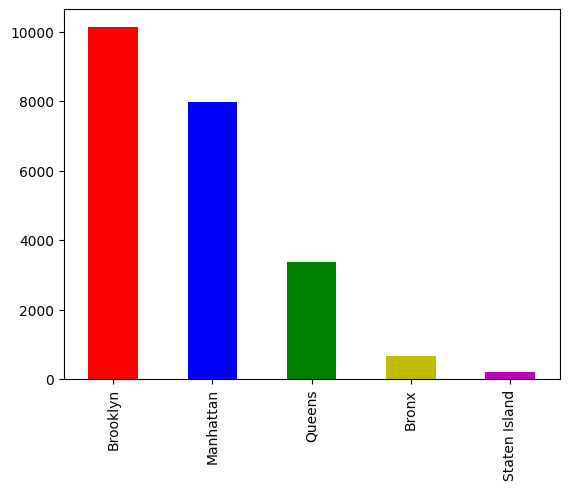

Brooklyn         10132
Manhattan         7982
Queens            3372
Bronx              652
Staten Island      188
Name: neighbourhood_group, dtype: int64


In [ ]:
private=df[df["room_type"]=="Private room"]

private["neighbourhood_group"].value_counts().plot(kind="bar",color=["r","b","g","y","m"])
plt.show()

print(private["neighbourhood_group"].value_counts())

**in above bar plot represent that in Brooklyn location has the most private rooms**

In [ ]:
private_list=private.groupby(['host_id',"host_name","neighbourhood_group","neighbourhood"]).size().reset_index(name="private rooms").sort_values(by=['private rooms'],ascending=False)
private_list.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,private rooms
15261,190921808,John,Manhattan,Hell's Kitchen,44
14025,137358866,Kazuya,Queens,Woodside,35
16301,238321374,Eyal,Manhattan,Upper West Side,32
15984,224414117,Gabriel,Manhattan,Hell's Kitchen,30
16035,226410657,Nina,Brooklyn,Bedford-Stuyvesant,26
16144,230192510,Zach,Brooklyn,Fort Greene,25
16386,242962235,Yuval,Queens,Ridgewood,23
16539,252604696,Erin,Manhattan,Chelsea,20
14024,137358866,Kazuya,Queens,Sunnyside,17
14661,159091490,Melissa,Brooklyn,Gowanus,17


**in above data is Top 10 private rooms and most private rooms hosted by (John) in Manhattan location**

## **To get the john data, And location of his hosting Locations and Area**

In [ ]:
john_data=df[df["host_name"]=="John"]
john_data_by=john_data[["host_id","host_name","neighbourhood","neighbourhood_group","latitude","longitude"]]
john_data_by.head()

,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude
0,2787,John,Kensington,Brooklyn,40.64749,-73.97237
429,715807,John,Greenwich Village,Manhattan,40.72831,-74.00177
620,1229984,John,Long Island City,Queens,40.74581,-73.95295
991,1488809,John,Bushwick,Brooklyn,40.70339,-73.92945
1141,2397411,John,Clinton Hill,Brooklyn,40.68545,-73.96534


**By using john data we can know his hosting locations in Map using folium library.**

In [ ]:
john_map=folium.Map([40.72831,-74.00177],zoom_start=11,width=1200, height=600)
review_location=john_data_by[["latitude","longitude"]]
HeatMap(review_location.dropna(),radius=10,gradient={.4: 'blue', .65: 'yellow', 1: 'red'}).add_to(john_map)
john_map

# **To Analyze Shared room data**
**3. we check the how many of the (shared rooms) And in which location ?**

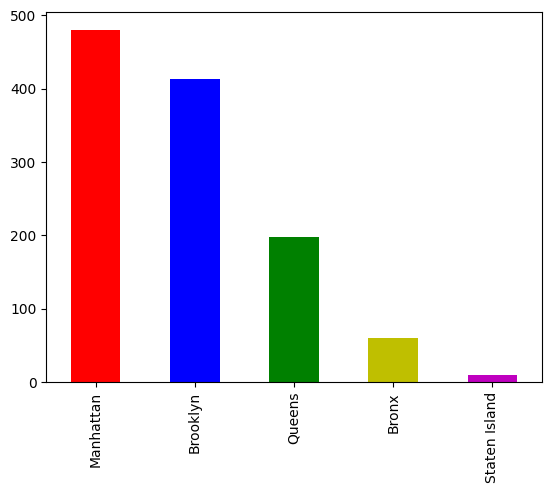

Manhattan        480
Brooklyn         413
Queens           198
Bronx             60
Staten Island      9
Name: neighbourhood_group, dtype: int64


In [ ]:
shared=df[df["room_type"]=="Shared room"]

shared["neighbourhood_group"].value_counts().plot(kind="bar",color=["r","b","g","y","m"])
plt.show()
print(shared["neighbourhood_group"].value_counts())

**In above Bar plot represents that most of the Shared rooms are Located at Manhattan**

In [ ]:
shared_list=shared.groupby(['host_id',"host_name","neighbourhood_group","neighbourhood"]).size().reset_index(name="shared").sort_values(by=["shared"],ascending=False)
shared_list.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,shared
339,39528519,Max,Manhattan,Lower East Side,23
529,119669058,Melissa,Brooklyn,Bedford-Stuyvesant,18
651,201015598,Anchor,Brooklyn,Bedford-Stuyvesant,17
618,175730239,Baboucarr,Queens,Sunnyside,10
663,209386156,Abraham,Manhattan,East Harlem,9
727,253906467,Erik,Manhattan,Hell's Kitchen,9
686,223087887,Jess & Ana,Queens,Corona,8
714,248161322,Sergii,Brooklyn,Bushwick,8
292,30509656,Orit,Bronx,Port Morris,8
635,187975743,R.Henry,Manhattan,Hell's Kitchen,8


**in above data is Top 10 shared rooms listings And most Shared rooms hosted by (Max) in Manhattan location**

# **To Get the  Max data and his hosting locations**

In [ ]:
max_data=df[df['host_name']=='Max']
max_data_by=max_data[["host_id","host_name","neighbourhood","latitude","longitude"]]
max_data_by.head()

,host_id,host_name,neighbourhood,latitude,longitude
755,1362808,Max,Upper East Side,40.76373,-73.96897
812,1502469,Max,East Village,40.72506,-73.98865
954,1869567,Max,Greenpoint,40.72488,-73.94013
2611,7387960,Max,Harlem,40.82660,-73.94443
4224,2333018,Max,Clinton Hill,40.68998,-73.96072


**By using Max data we can know his hosting locations in Map using folium library.**

In [ ]:
max_map=folium.Map([40.68998,-73.96897],zoom_start=13,width=1200, height=600)
review_location=max_data_by[["latitude","longitude"]]
HeatMap(review_location.dropna(),radius=10,gradient={.4: 'blue', .65: 'yellow', 1: 'red'}).add_to(max_map)
max_map

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**# The below bar plot represents that location of the data**

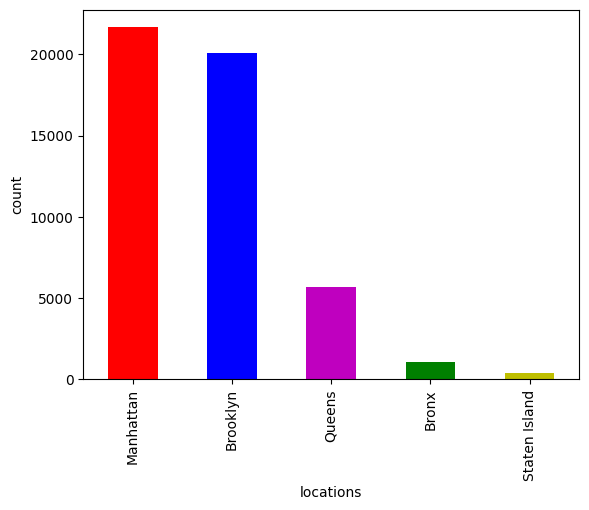

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [ ]:
df["neighbourhood_group"].value_counts().plot(kind="bar",color=["r","b","m","g","y"])
plt.xlabel("locations")
plt.ylabel("count")
plt.show()
print(df["neighbourhood_group"].value_counts())

**in above bar plot we can see that in the data, The most preferred location is Manhattan and lowest is Staten Island**

In [ ]:
location=df[df["neighbourhood_group"]=="Manhattan"]
location_list=location.groupby(["host_id","host_name","neighbourhood_group","neighbourhood"]).size().reset_index(name="count").sort_values(by=["count"],ascending=False)

In [ ]:
location_list.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,count
15621,219517861,Sonder (NYC),Manhattan,Financial District,218
5701,12243051,Sonder,Manhattan,Financial District,51
15624,219517861,Sonder (NYC),Manhattan,Murray Hill,50
13768,120762452,Stanley,Manhattan,Murray Hill,50
15380,205031545,Red Awning,Manhattan,Midtown,49
15150,190921808,John,Manhattan,Hell's Kitchen,46
8892,30283594,Kara,Manhattan,Hell's Kitchen,41
13463,107434423,Blueground,Manhattan,Chelsea,37
13622,113805886,Yaacov,Manhattan,Upper East Side,33
8894,30283594,Kara,Manhattan,Midtown,33


**In above data states that, In Manhattan location, the most preferred Area is Financial District and Hosted by Sonder(NYC)**

In [ ]:
# To check null values in "Price" column
df.price.isna().sum()

0

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In according to the summary statistics it is clear that the Price ranges from  0−180. But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. Also, we can see from the below there are few few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.

We also plot a boxplot to understand how the data is spread out for high ranges for the price irrespective of region.

In [ ]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

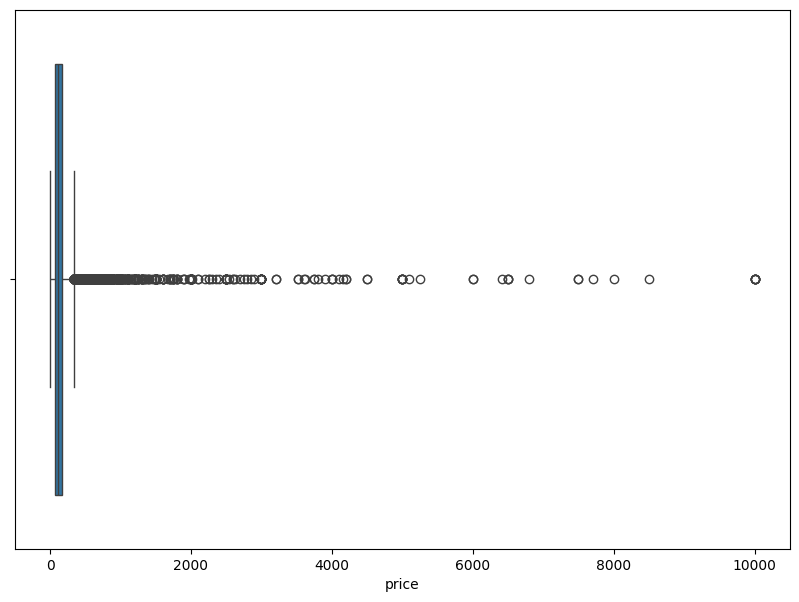

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x="price")
plt.show()

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

# **To  check the average price per night based on the (room_type) and (neighbourhood group[Locations])**

                                          price
room_type       neighbourhood_group            
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595


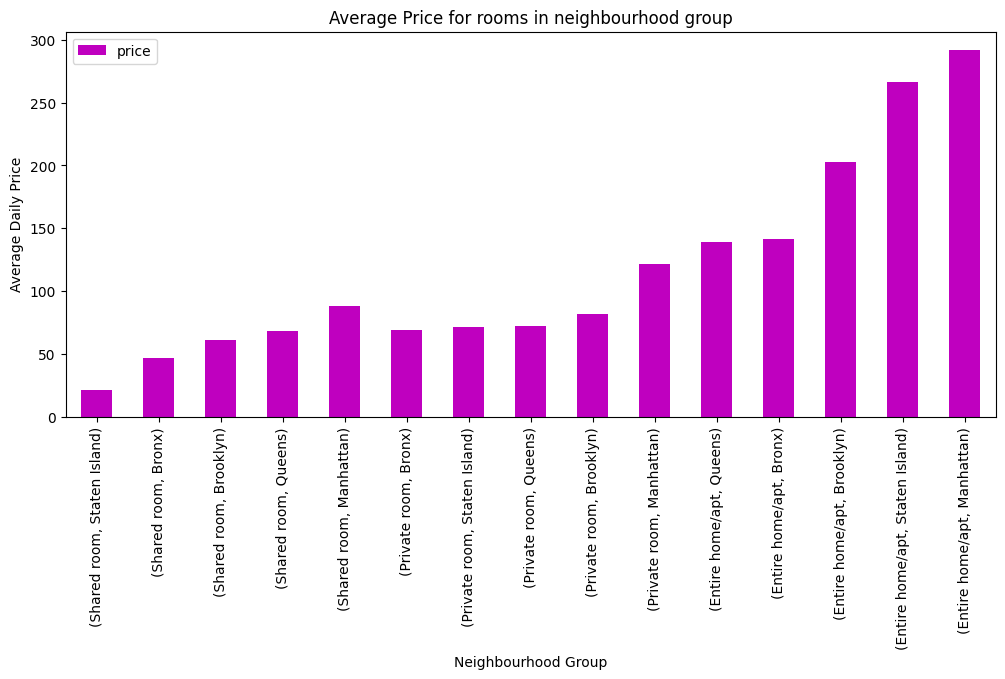

In [ ]:
df1=df[df["minimum_nights"]==1]
df2=df1.groupby(["room_type","neighbourhood_group"])["price"].mean().sort_values(ascending=True)
df3=pd.DataFrame(df2).sort_values(by=["room_type"],ascending=False)

df3.plot(kind="bar",figsize=(12,5),color='m')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
print(df3)
plt.show()

**as we can see that  in the plot!  highest avg price/night is (Entirehome/apt, Manhattan) | And lowest avg price/night is (Shared room,sataten island)**

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


# **TOP 15  most expensive locality areas in Airbnb listing are :**


<ipython-input-59-d805a3022633>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_price_neighbourhood=df.dropna(subset=['price']).groupby(["neighbourhood"])["neighbourhood","price"].mean().sort_values(by="price",ascending=False).head(15)
<ipython-input-59-d805a3022633>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_neighbourhood=df.dropna(subset=['price']).groupby(["neighbourhood"])["neighbourhood","price"].mean().sort_values(by="price",ascending=False).head(15)


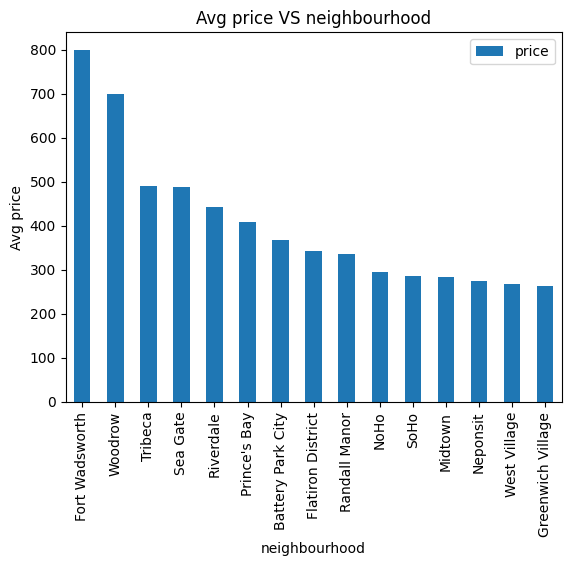

                        price
neighbourhood                
Fort Wadsworth     800.000000
Woodrow            700.000000
Tribeca            490.638418
Sea Gate           487.857143
Riverdale          442.090909
Prince's Bay       409.500000
Battery Park City  367.557143
Flatiron District  341.925000
Randall Manor      336.000000
NoHo               295.717949
SoHo               287.103352
Midtown            282.719094
Neponsit           274.666667
West Village       267.682292
Greenwich Village  263.405612


In [ ]:
avg_price_neighbourhood=df.dropna(subset=['price']).groupby(["neighbourhood"])["neighbourhood","price"].mean().sort_values(by="price",ascending=False).head(15)
avg_price_neighbourhood.plot(kind="bar")
plt.xlabel("neighbourhood")
plt.ylabel("Avg price")
plt.title("Avg price VS neighbourhood")
plt.show()
print(avg_price_neighbourhood)

As we can see That in above bar plotshows that avg highest expensive area is Fort Wadsworth is 800

# **Top 15 low expensive locality areas in Airbnb listing are :**

---




<ipython-input-60-6c706ab1fb73>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_price_neighbourhood=df.dropna(subset=['price']).groupby(["neighbourhood"])["neighbourhood","price"].mean().sort_values(by="price",ascending=False).tail(15)
<ipython-input-60-6c706ab1fb73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_neighbourhood=df.dropna(subset=['price']).groupby(["neighbourhood"])["neighbourhood","price"].mean().sort_values(by="price",ascending=False).tail(15)


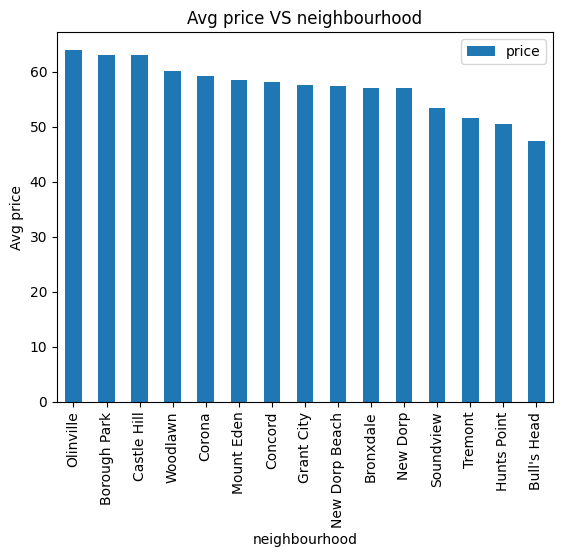

                    price
neighbourhood            
Olinville       64.000000
Borough Park    63.066176
Castle Hill     63.000000
Woodlawn        60.090909
Corona          59.171875
Mount Eden      58.500000
Concord         58.192308
Grant City      57.666667
New Dorp Beach  57.400000
Bronxdale       57.105263
New Dorp        57.000000
Soundview       53.466667
Tremont         51.545455
Hunts Point     50.500000
Bull's Head     47.333333


In [ ]:
avg_price_neighbourhood=df.dropna(subset=['price']).groupby(["neighbourhood"])["neighbourhood","price"].mean().sort_values(by="price",ascending=False).tail(15)
avg_price_neighbourhood.plot(kind="bar")
plt.xlabel("neighbourhood")
plt.ylabel("Avg price")
plt.title("Avg price VS neighbourhood")
plt.show()
print(avg_price_neighbourhood)

As we can see That in above bar plotshows that avg lowest expensive area is Bull's Head is 47.333333

# **##To know the Top 15 Areas listing count**

In [ ]:
df5=df.groupby('neighbourhood')[["host_name"]].count()["host_name"].reset_index(name="count").sort_values(by=["count"],ascending=False).head(15)
df5

**The below bar plot represents the count of Top 15 Area listing count**

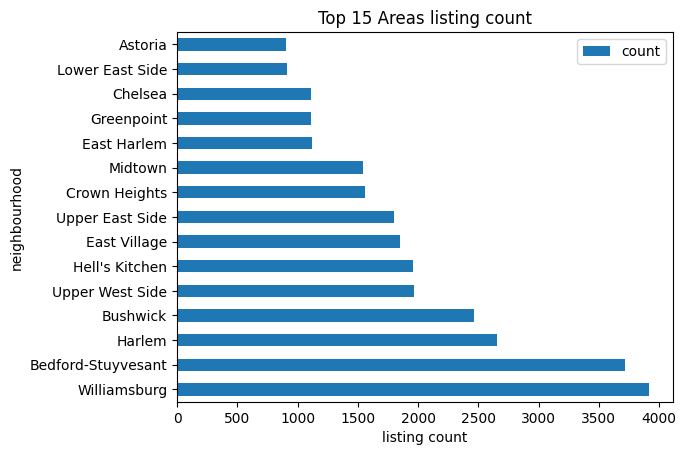

In [ ]:
df5.plot(kind="barh", x="neighbourhood", y="count")
plt.title("Top 15 Areas listing count")
plt.xlabel("listing count")
plt.show()

**##We can see in above plot Williamsburg (3919) has most number of listing count.**

# **##To know the Below 15 Areas listing count**

In [ ]:
df5=df.groupby('neighbourhood')[["host_name"]].count()["host_name"].reset_index(name="count").sort_values(by=["count"],ascending=False).tail(15)
df5

,neighbourhood,count
101,Huguenot,3
21,Breezy Point,3
211,Westerleigh,2
100,Howland Hook,2
42,Co-op City,2
9,"Bay Terrace, Staten Island",2
208,West Farms,2
114,Lighthouse Hill,2
177,Silver Lake,2
172,Rossville,1


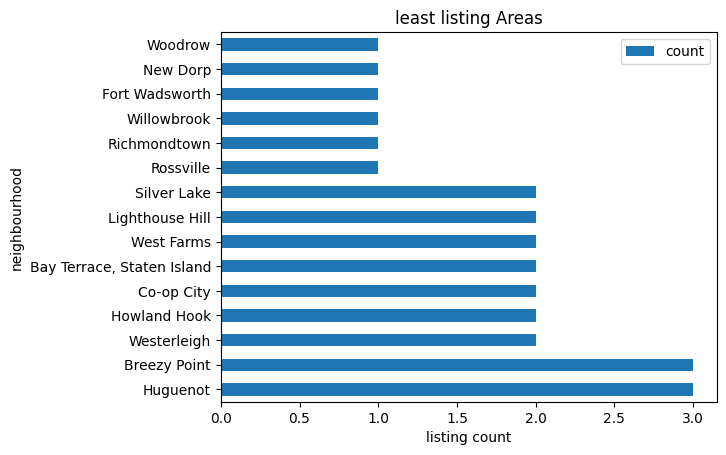

In [ ]:
df5.plot(kind="barh", x="neighbourhood", y="count")
plt.xlabel("listing count")
plt.title("least listing Areas")
plt.show()

**##As we can see the above plot Fort Wadesworth has one of the least listing i.e 1.**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **To check the Reviews Score Minimum 50 and Above Locations**

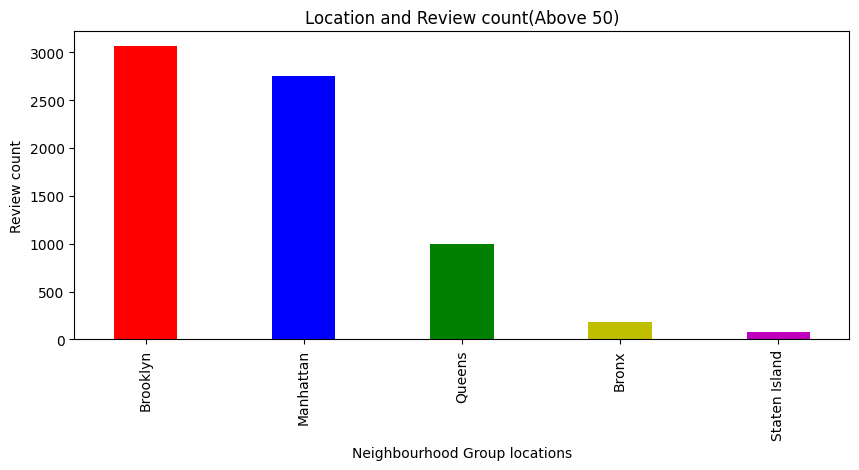

                        0
neighbourhood_group      
Brooklyn             3065
Manhattan            2751
Queens                997
Bronx                 187
Staten Island          81


In [ ]:
review_50=df[df["number_of_reviews"]>=50]

df7=review_50.groupby(["neighbourhood_group"])[["neighbourhood_group"]].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,4))
df7.plot(kind="bar",color=['r','b','g','y','m'],width=0.4)
plt.title('Location and Review count(Above 50)')
plt.ylabel('Review count')
plt.xlabel('Neighbourhood Group locations')
plt.show()

print(pd.DataFrame(df7))


In Above bar-plot shows that Brooklyn has the highest review score count and staten island has the lowest review score!

In [ ]:
df7

neighbourhood_group
Brooklyn         3065
Manhattan        2751
Queens            997
Bronx             187
Staten Island      81
dtype: int64

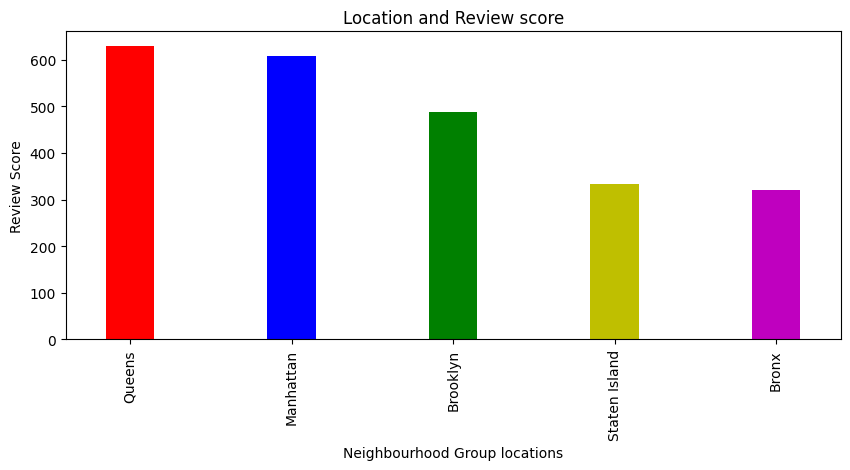

In [ ]:
df7=review_50.groupby(["neighbourhood_group"])["number_of_reviews"].max().sort_values(ascending=False)

plt.figure(figsize=(10,4))
df7.plot(kind="bar",color=['r','b','g','y','m'],width=0.3)
plt.title('Location and Review score')
plt.ylabel('Review Score')
plt.xlabel('Neighbourhood Group locations')
plt.show()

In [ ]:
review_50.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


#### Based on The Above data we can know the top host

**##Based on the review score(Minimum 50 and above) we will plot, who is our top Host, this increases the confidence of tourist before booking.**

In [ ]:
top_hosts=review_50.groupby(["host_name",])[["host_name"]].value_counts().sort_values(ascending=False).head(5)

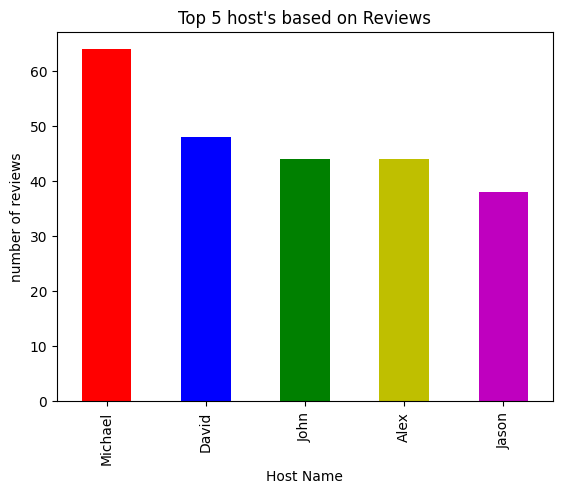

host_name
Michael    64
David      48
John       44
Alex       44
Jason      38
dtype: int64


In [ ]:
top_hosts.plot(kind="bar",color=['r','b','g','y','m'])
plt.xlabel("Host Name")
plt.ylabel("number of reviews")
plt.title("Top 5 host's based on Reviews")
plt.show()

print(top_hosts)

# **Michael is the top host from above plot**

**Also lets plot based on the review score data and lattitude,longitude we show in map**

In [ ]:
map2=folium.Map([40.68,-73.95],zoom_start=10.5,width=1200, height=600)
review_location=review_50[["latitude","longitude"]]

HeatMap(review_location.dropna(),radius=10,gradient={.4: 'blue', .65: 'yellow', 1: 'red'}).add_to(map2)
map2

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Below Scatter-Plot shows Price based on the Availability 365**

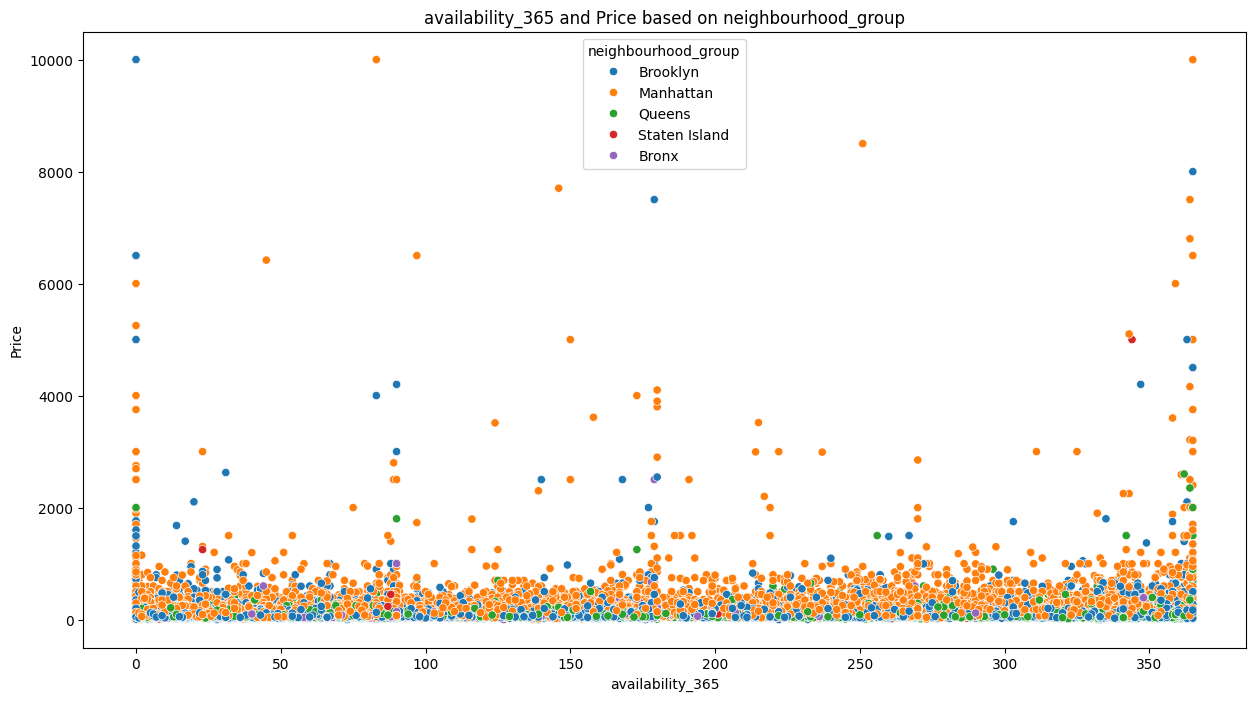

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x="availability_365",y="price",hue="neighbourhood_group")
plt.xlabel("availability_365")
plt.ylabel("Price")
plt.title("availability_365 and Price based on neighbourhood_group")
plt.show()

To understand if there is any price increase based on the availability and looking above the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

In [ ]:
review_50.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## **Average Listing for each room_type and  Neighbourhood group of based on  review score data!**

In [ ]:
df11=review_50.groupby(['room_type','neighbourhood_group']).mean()

<ipython-input-69-15126e826a5b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df11=review_50.groupby(['room_type','neighbourhood_group']).mean()


In [ ]:
df11=df11.drop(["id","reviews_per_month","calculated_host_listings_count"],axis=1)

In [ ]:
df11

host_id   latitude  longitude  \
room_type       neighbourhood_group                                       
Entire home/apt Bronx                6.834402e+07  40.845571 -73.874437   
                Brooklyn             3.800371e+07  40.681820 -73.950473   
                Manhattan            3.753960e+07  40.760908 -73.975440   
                Queens               6.497462e+07  40.728087 -73.864378   
                Staten Island        7.416233e+07  40.615301 -74.098382   
Private room    Bronx                5.771343e+07  40.848007 -73.894449   
                Brooklyn             3.718687e+07  40.684031 -73.948452   
                Manhattan            4.220649e+07  40.776921 -73.968273   
                Queens               7.468608e+07  40.733657 -73.863445   
                Staten Island        5.922092e+07  40.622883 -74.096828   
Shared room     Bronx                8.610883e+07  40.840340 -73.830070   
                Brooklyn             3.795770e+07  40.668842 -73.941362   
                Manhattan            7.222840e+07  40.772727 -73.972424   
                Queens               9.552170e+07  40.716744 -73.843495   

                                          price  minimum_nights  \
room_type       neighbourhood_group                               
Entire home/apt Bronx                107.000000        2.212500   
                Brooklyn             158.782955        3.921023   
                Manhattan            218.531682        4.694829   
                Queens               124.053012        2.725301   
                Staten Island        105.652174        3.108696   
Private room    Bronx                 53.132075        2.084906   
                Brooklyn              71.594192        2.731554   
                Manhattan             97.856049        3.114855   
                Queens                61.807356        2.402802   
                Staten Island         54.714286        2.857143   
Shared room     Bronx                 20.000000        1.000000   
                Brooklyn              40.806452        1.967742   
                Manhattan             62.444444        1.916667   
                Queens                43.181818        1.363636   

                                     number_of_reviews  availability_365  
room_type       neighbourhood_group                                       
Entire home/apt Bronx                       101.325000        197.387500  
                Brooklyn                    109.513068        171.889773  
                Manhattan                   106.798980        157.758194  
                Queens                      104.643373        184.932530  
                Staten Island                95.065217        197.217391  
Private room    Bronx                       100.566038        177.660377  
                Brooklyn                    109.997645        155.525118  
                Manhattan                   117.383614        144.607198  
                Queens                      116.199650        187.637478  
                Staten Island               105.742857        270.742857  
Shared room     Bronx                       116.000000          5.000000  
                Brooklyn                    105.322581        163.258065  
                Manhattan                    92.916667        170.402778  
                Queens                      122.454545        170.727273

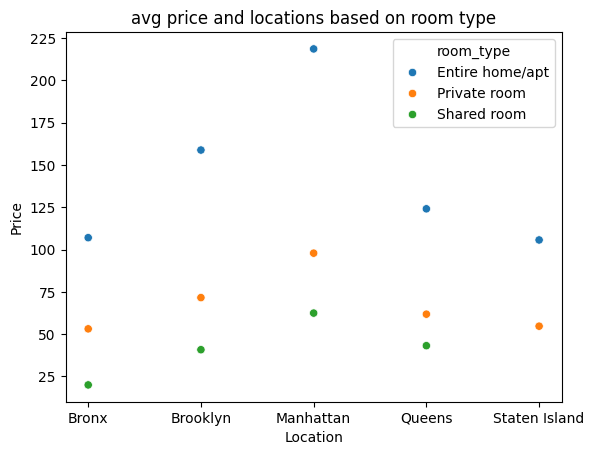

In [ ]:
sns.scatterplot(data=df11,x="neighbourhood_group",y="price",hue="room_type")
plt.xlabel("Location")
plt.ylabel("Price")
plt.title("avg price and locations based on room type")
plt.show()

In above scatter plot shows that the avg price is high in (home/apt) in Manhattan locaton, And low in (shared room) in bronx

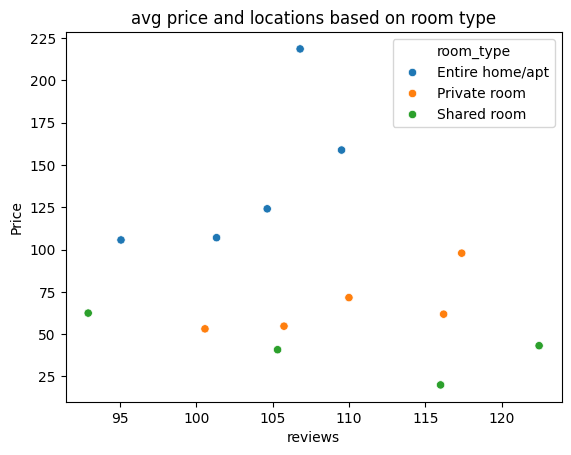

In [ ]:
sns.scatterplot(data=df11,x="number_of_reviews",y="price",hue="room_type")
plt.xlabel("reviews")
plt.ylabel("Price")
plt.title("avg price and locations based on room type")
plt.show()

## **Conclusion:**

* In Given data Most listing count in (home/apartment) and (Private_room) have more rooms than (Shared_room).

**Based on Rooms:**
1. According To the Most of the home/apartment rooms are highly located at Manhattan. And the top 10 (home/apartment) listings hosted by (sonder(NYC)). in Manhattan location.

2. According To private_rooms data, Most of the private_rooms are located at Brooklyn. And top 10 (private_rooms) listings hosted by (John.) in Manhattan location.

3. According To the Shared_rooms data, Most of the Shared rooms are Located at Manhattan.And top 10 (shared_rooms) listings hosted by (Max) in Manhattan location.

**Based on Location:**
1. According To the Dataset And Analysis Most preferred location is Manhattan. and lowest is Staten Island.

2. In Manhattan location, The Most preferred Area is "Financial District" and Hosted by Sonder(NYC).

3. According To the Anylsis the highest Avg_price/night is in (home/apartment) in 'Manhattan' location. And lowest avg price/night is (Shared room) in sataten_island location.

**Based on Area:**
*  According To the Area,The highest Avg expensive area is "Fort Wadsworth" is 800. And lowest Avg expensive area is "Bull's Head" is 47.333333

**Based on Review Score:**

* According To the Review score  Brooklyn has the highest review score where as staten island has the lowest review score. And Based on this review score(Minimum 50 and above)  "Michael" is the top host , this increases the confidence of tourist before booking.

**Price vs Availability:**

* To understand if there is any price increase based on the availability and looking above the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

**According to the Avg grouping data:**

* Avg price is high in (home/apartment) in Manhattan locaton, And low in (shared_
room) in bronx



